<a href="https://colab.research.google.com/github/yanlima07/circCodan_analisys/blob/main/CircCodan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CircRNA Exploratory Research

This exploratory research comprises two sections. The first section focuses on the TransCric dataset, while the second section deals with the RiboCirc dataset. Both sections compare the original datasets with the results obtained using CircCodan to demonstrate the tool's efficacy.

# TransCirc Analysis

Using *pandas*, the datasets provided alongside the CircCodan files, are imported to the code and pre-processed by inserting their column names.

In [ ]:
import pandas as pd

trans_ms_cdsAnnotation = pd.read_csv('/content/drive/MyDrive/CircRNA/TransCirc/MS-evidence/CDS_annotation.gtf', sep='\t', skiprows=1, header=None)
trans_ms_cdsAnnotation_prediction = pd.read_csv('/content/drive/MyDrive/CircRNA/TransCirc/MS-evidence/circCodAn_output/CDS_prediction.gtf', sep='\t', skiprows=1, header=None)
trans_rppp_cdsAnnotation = pd.read_csv('/content/drive/MyDrive/CircRNA/TransCirc/RP-PP-evidence/CDS_annotation.gtf', sep='\t', skiprows=1, header=None)
trans_rppp_cdsAnnotation_prediction = pd.read_csv('/content/drive/MyDrive/CircRNA/TransCirc/RP-PP-evidence/circCodAn_output/CDS_prediction.gtf', sep='\t', skiprows=1, header=None)
trans_tis_cdsAnnotation = pd.read_csv('/content/drive/MyDrive/CircRNA/TransCirc/TIS-evidence/CDS_annotation.gtf', sep='\t', skiprows=1, header=None)
trans_tis_cdsAnnotation_prediction = pd.read_csv('/content/drive/MyDrive/CircRNA/TransCirc/TIS-evidence/circCodAn_output/CDS_prediction.gtf', sep='\t', skiprows=1, header=None)

trans_data = [trans_ms_cdsAnnotation, trans_ms_cdsAnnotation_prediction, trans_rppp_cdsAnnotation, trans_rppp_cdsAnnotation_prediction, trans_tis_cdsAnnotation, trans_tis_cdsAnnotation_prediction]
trans_datasets = ['TransCirc (MS)', 'TransCirc (MS) by CirCodAn','TransCirc (RP-PP)', 'TransCirc (RP-PP) by CirCodAn', 'TransCirc (TIS)', 'TransCirc (TIS) by CirCodAn']

for i in trans_data:
  i.columns=['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

By filtering the rows with strings greater than 1 character, is possible to select the rows with relevant data. Since most of the "attribute" column's rows are filled with ".", rows with more than 1 character contain relevant data for the analysis.

In [ ]:
trans_data = [cds['attribute'][cds['attribute'].str.len() > 1] for cds in trans_data]

The filtering process results in data that can be split in two categories. Those categories are the length of the ORF and the number of translation cycles.

In [ ]:
trans_data = [[item.split(';') for item in cds_row] for cds_row in trans_data]

Next, the code cleans up the data by removing unnecessary characters and splitting the length of the ORFs and the number of translation cycles into separate lists. This process prepares the list of ORF lengths for further analysis.

In [ ]:
trans_lengths_data = []
trans_translation_cycles_data = []

for data_list in trans_data:
  lengths = [int(item[1].replace(" length=", "")) for item in data_list]
  trans_lengths_data.append(lengths)

  translation_cycles = [item[0] for item in data_list]
  trans_translation_cycles_data.append(translation_cycles)

Now, with the translation cycles in one list, is possible to compute how many translation cycles are in each category.

In [ ]:
trans_num_tc_data = []

for tc_list in trans_translation_cycles_data:
  trans_num_tc_data.append([sum([1 for tc in tc_list if "=1" in tc.lower()]), 
                      sum([1 for tc in tc_list if "=2" in tc.lower()]), 
                      sum([1 for tc in tc_list if "=3" in tc.lower()])])

#print(len(trans_translation_cycles_data[0]), len(trans_translation_cycles_data[1]), trans_num_tc_data)
#print(len(trans_lengths_data[0]), len(trans_lengths_data[1]), trans_lengths_data)

Now that all the data has been processed and sorted, the code can generate pie charts to visualize the differences between the original datasets and the output data from the tool.

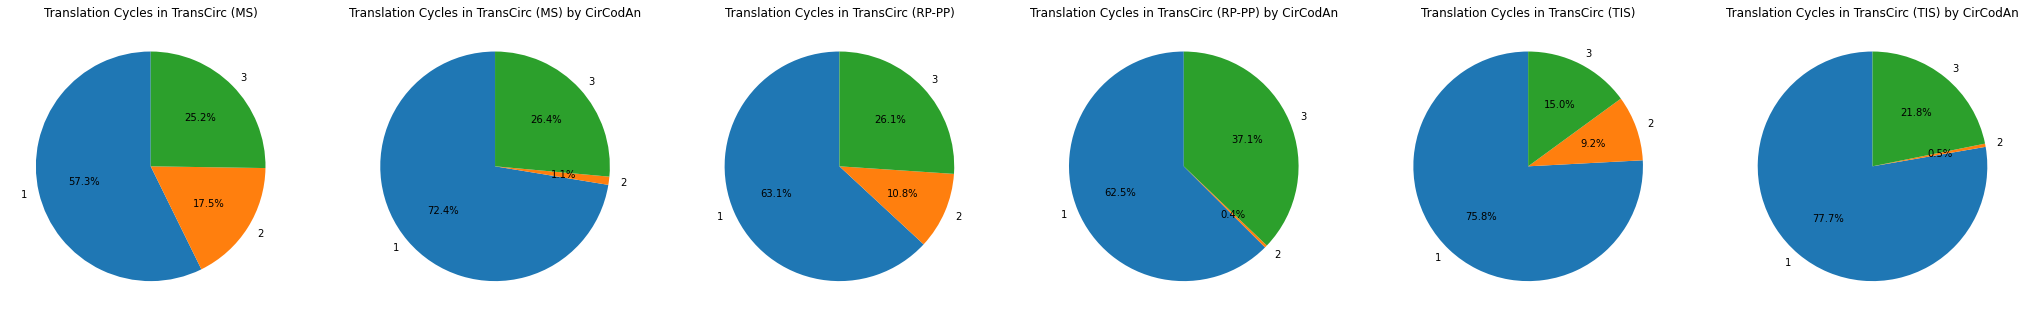

In [ ]:
import matplotlib.pyplot as plt

labels = ['1', '2', '3']
colors = plt.cm.tab10.colors[:len(trans_num_tc_data[0])]

sizes = [i for i in trans_num_tc_data]
trans_num_elements = len(trans_num_tc_data)

fig, axs = plt.subplots(1, trans_num_elements, figsize=(6*trans_num_elements, 3*trans_num_elements))

for i, ax in enumerate(axs):
    ax.pie(trans_num_tc_data[i], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title("Translation Cycles in {}".format(trans_datasets[i]))

plt.gca().set_facecolor('white')

plt.show()

As demonstrated above, it is clear that the tool cannot accurately determine whether the ORF has a translation cycle of size 2 or not. According to the pie charts, the tool smashes the slice of size two traslation cycles. As a result, in some cases, the accuracy in predicting ORFs with size 3 translation cycles is favored, while in other cases, the accuracy with size 1 translation cycles is favored.

For the boxplot of the data in analysis the code below was used.

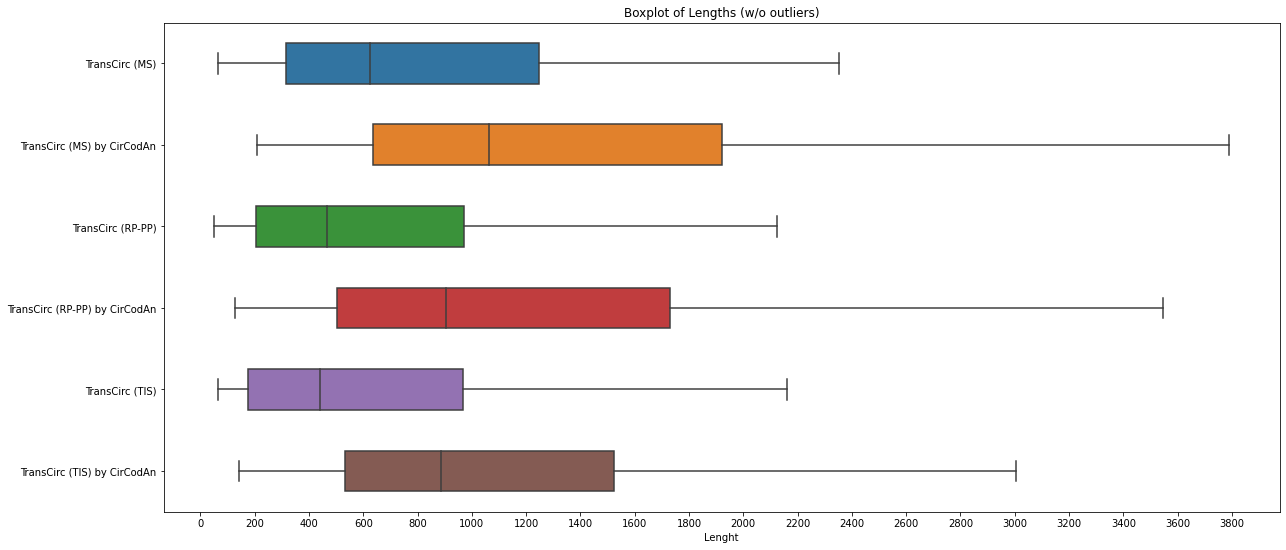

In [ ]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 1.5*trans_num_elements))

ax = sns.boxplot(data=trans_lengths_data, width=0.5, showfliers=False, orient='h')

plt.title('Boxplot of Lengths (w/o outliers)')
plt.xlabel('Lenght')
plt.ylabel('')
plt.xticks(np.arange(0, 3801, 200))
ax.set_yticklabels(trans_datasets)
plt.gca().set_facecolor('white')

plt.show()

The boxplot, with the outliers removed, shows a significant increase in the length of ORFs predicted by CircCodan. As seen earlier in the pie charts, the inaccuracies in predicting the size of translation cycles resulted in larger ORFs. In almost every prediction, the median was shifted to the upper quartile of the respective TransCirc sequences.

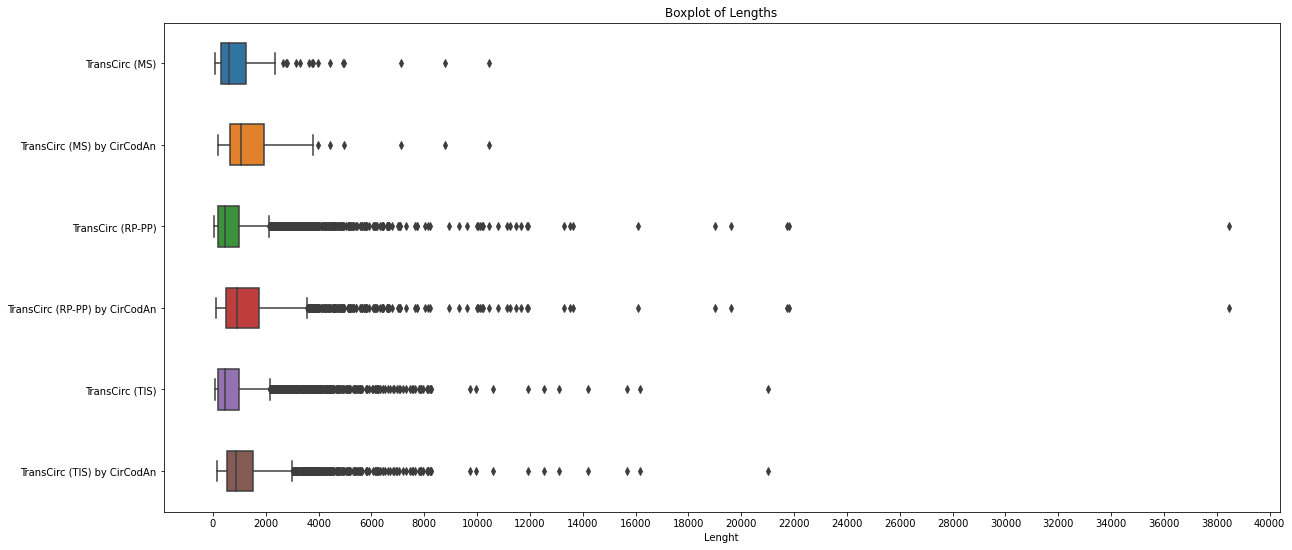

In [ ]:
plt.figure(figsize=(20, 1.5*trans_num_elements))

ax = sns.boxplot(data=trans_lengths_data, width=0.5, showfliers=True, orient='h')

plt.title('Boxplot of Lengths')
plt.xlabel('Lenght')
plt.ylabel('')
plt.xticks(np.arange(0, 40001, 2000))
ax.set_yticklabels(trans_datasets)
plt.gca().set_facecolor('white')

plt.show()

The boxplots, shown above with the outliers included, suggest that, in a certain way, all CircCodan predictions match the outliers from the original datasets visually.

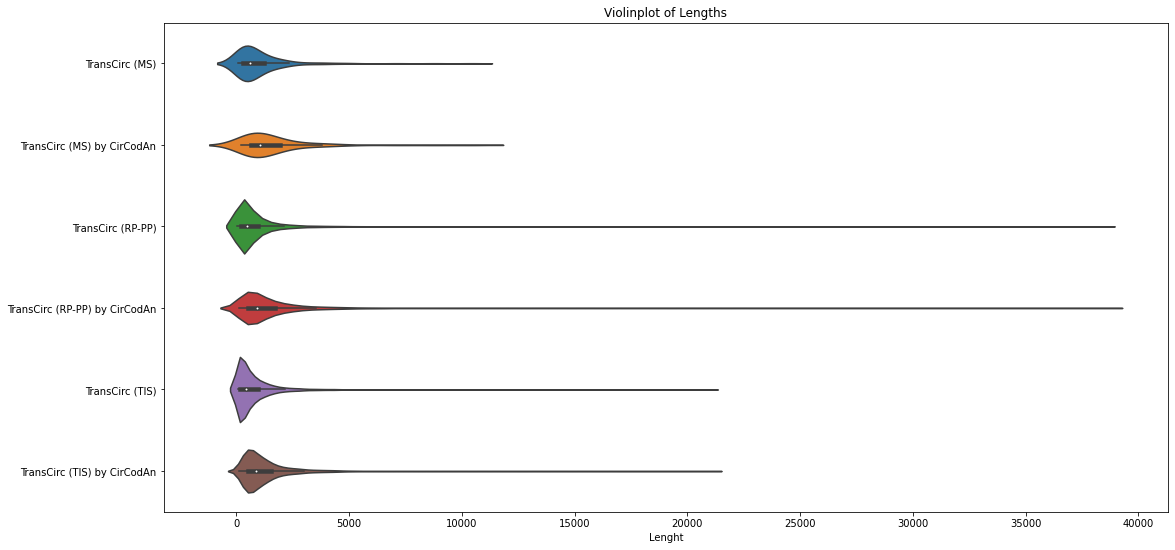

In [ ]:
plt.figure(figsize=(3*trans_num_elements, 1.5*trans_num_elements))

ax = sns.violinplot(data=trans_lengths_data, orient='h')

plt.title('Violinplot of Lengths')
plt.xlabel('Lenght')
plt.ylabel('')
#plt.yticks(np.arange(0, 11501, 500))
ax.set_yticklabels(trans_datasets)
plt.gca().set_facecolor('white')

plt.show()

Upon analyzing the violin plots, we can confirm the previously demonstrated increase in sequence length predicted by CircCodan. A significant amount of data is shifted towards greater lengths of sequences.

# RiboCirc Analysis

The code below analyzes the RiboCirc dataset using the same principles and methods demonstrated earlier. Also, the results shown in this section are affected by the same factors discussed in the previous section.

In [ ]:
ribo_hsa_dependent_cdsAnnotation = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/hsa-cond-depend-evidence/CDS_annotation.gtf', sep='\t', skiprows=1, header=None)
ribo_hsa_dependent_cdsAnnotation_prediction = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/hsa-cond-depend-evidence/circCodAn_output/CDS_prediction.gtf', sep='\t', skiprows=1, header=None)
ribo_hsa_independent_cdsAnnotation = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/hsa-cond-independ-evidence/CDS_annotation.gtf', sep='\t', skiprows=1, header=None)
ribo_hsa_independent_cdsAnnotation_prediction = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/hsa-cond-independ-evidence/circCodAn_output/CDS_prediction.gtf', sep='\t', skiprows=1, header=None)
ribo_mmu_dependent_cdsAnnotation = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/mmu-cond-depend-evidence/CDS_annotation.gtf', sep='\t', skiprows=1, header=None)
ribo_mmu_dependent_cdsAnnotation_prediction = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/mmu-cond-depend-evidence/circCodAn_output/CDS_prediction.gtf', sep='\t', skiprows=1, header=None)
ribo_mmu_independent_cdsAnnotation = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/mmu-cond-independ-evidence/CDS_annotation.gtf', sep='\t', skiprows=1, header=None)
ribo_mmu_independent_cdsAnnotation_prediction = pd.read_csv('/content/drive/MyDrive/CircRNA/riboCirc/mmu-cond-independ-evidence/circCodAn_output/CDS_prediction.gtf', sep='\t', skiprows=1, header=None)

ribo_data = [ribo_hsa_dependent_cdsAnnotation, ribo_hsa_dependent_cdsAnnotation_prediction, ribo_hsa_independent_cdsAnnotation, ribo_hsa_independent_cdsAnnotation_prediction, ribo_mmu_dependent_cdsAnnotation, ribo_mmu_dependent_cdsAnnotation_prediction, ribo_mmu_independent_cdsAnnotation, ribo_mmu_independent_cdsAnnotation_prediction]
ribo_datasets = ['riboCirc hsa dependent', 'riboCirc hsa dependent by CirCodAn','riboCirc hsa independent', 'riboCirc hsa independent by CirCodAn', 'riboCirc mmu dependent', 'riboCirc mmu dependent by CirCodAn','riboCirc mmu independent', 'riboCirc mmu independent by CirCodAn']

for i in ribo_data:
  i.columns=['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

In [ ]:
ribo_data = [cds['attribute'][cds['attribute'].str.len() > 1] for cds in ribo_data]

ribo_data = [[item.split(';') for item in cds_row] for cds_row in ribo_data]

ribo_lengths_data = []
ribo_translation_cycles_data = []

for data_list in ribo_data:
  lengths = [int(item[1].replace(" length=", "")) for item in data_list]
  ribo_lengths_data.append(lengths)

  translation_cycles = [item[0] for item in data_list]
  ribo_translation_cycles_data.append(translation_cycles)

ribo_num_tc_data = []

for tc_list in ribo_translation_cycles_data:
  ribo_num_tc_data.append([sum([1 for tc in tc_list if "=1" in tc.lower()]), 
                      sum([1 for tc in tc_list if "=2" in tc.lower()]), 
                      sum([1 for tc in tc_list if "=3" in tc.lower()])])

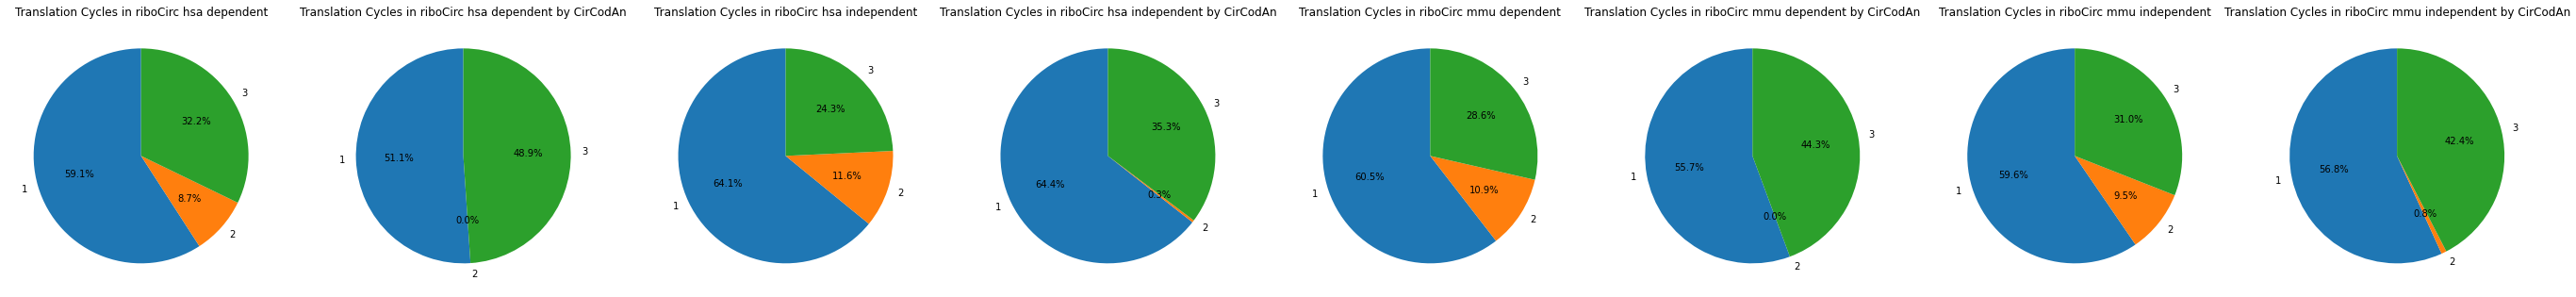

In [ ]:
import matplotlib.pyplot as plt

labels = ['1', '2', '3']
colors = plt.cm.tab10.colors[:len(ribo_num_tc_data[0])]

sizes = [i for i in ribo_num_tc_data]
ribo_num_elements = len(ribo_num_tc_data)

fig, axs = plt.subplots(1, ribo_num_elements, figsize=(6*ribo_num_elements, 5*ribo_num_elements))

for i, ax in enumerate(axs):
    ax.pie(ribo_num_tc_data[i], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title("Translation Cycles in {}".format(ribo_datasets[i]))

plt.gca().set_facecolor('white')
plt.show()

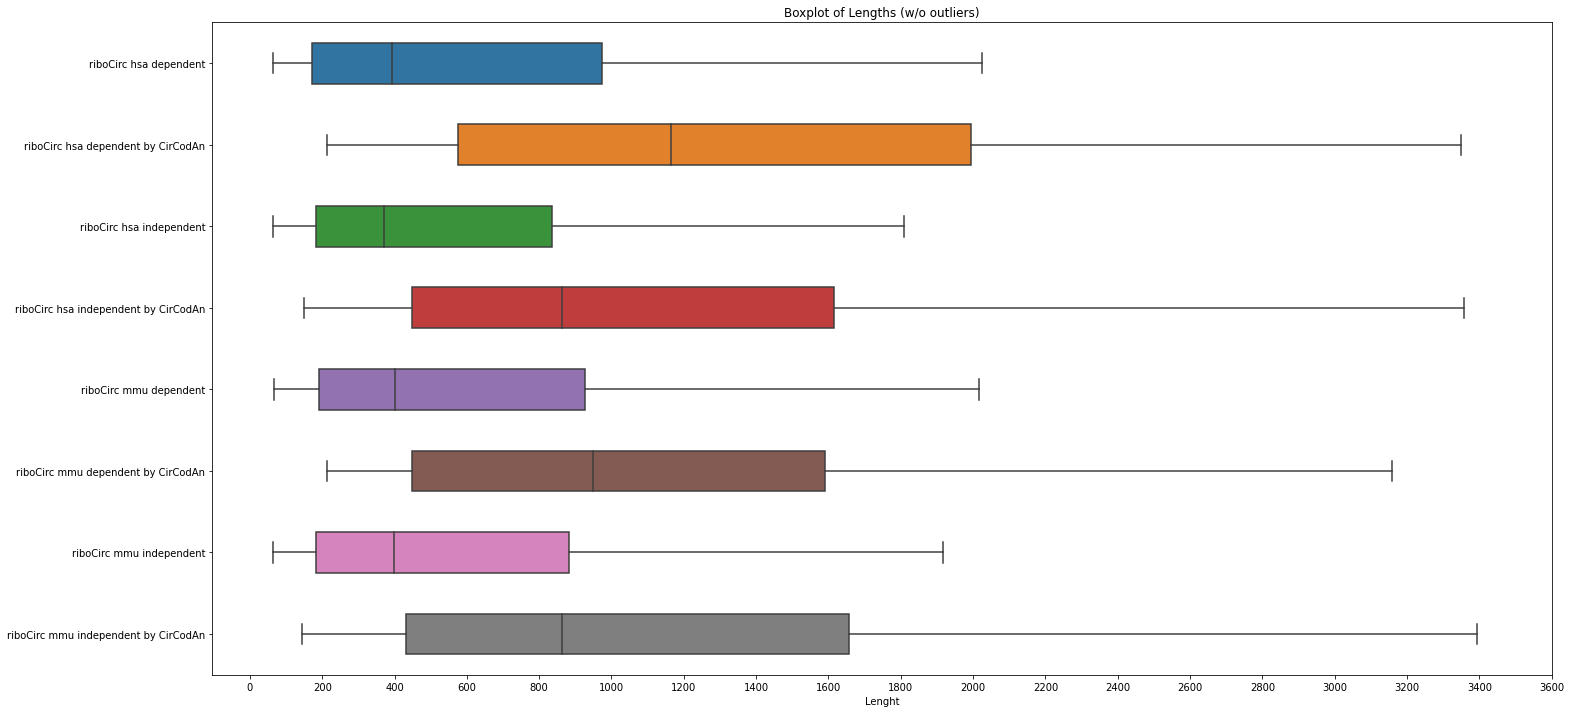

In [ ]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(3*ribo_num_elements, 1.5*ribo_num_elements))

ax = sns.boxplot(data=ribo_lengths_data, width=0.5, showfliers=False, orient='h')

plt.title('Boxplot of Lengths (w/o outliers)')
plt.xlabel('Lenght')
plt.ylabel('')
plt.xticks(np.arange(0, 3601, 200))
ax.set_yticklabels(ribo_datasets)
plt.gca().set_facecolor('white')

plt.show()

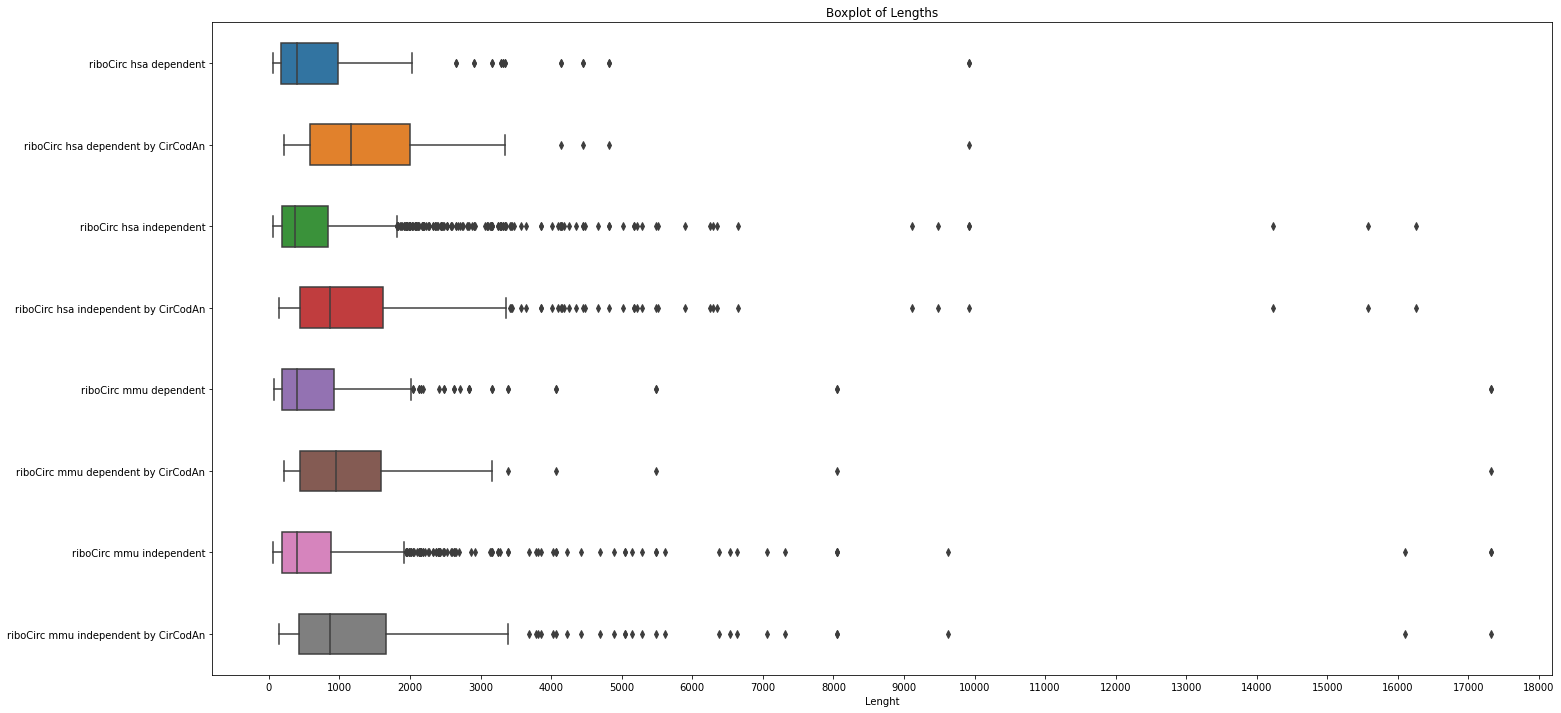

In [ ]:
plt.figure(figsize=(3*ribo_num_elements, 1.5*ribo_num_elements))

ax = sns.boxplot(data=ribo_lengths_data, width=0.5, showfliers=True, orient='h')

plt.title('Boxplot of Lengths')
plt.xlabel('Lenght')
plt.ylabel('')
plt.xticks(np.arange(0, 18001, 1000))
ax.set_yticklabels(ribo_datasets)
plt.gca().set_facecolor('white')

plt.show()

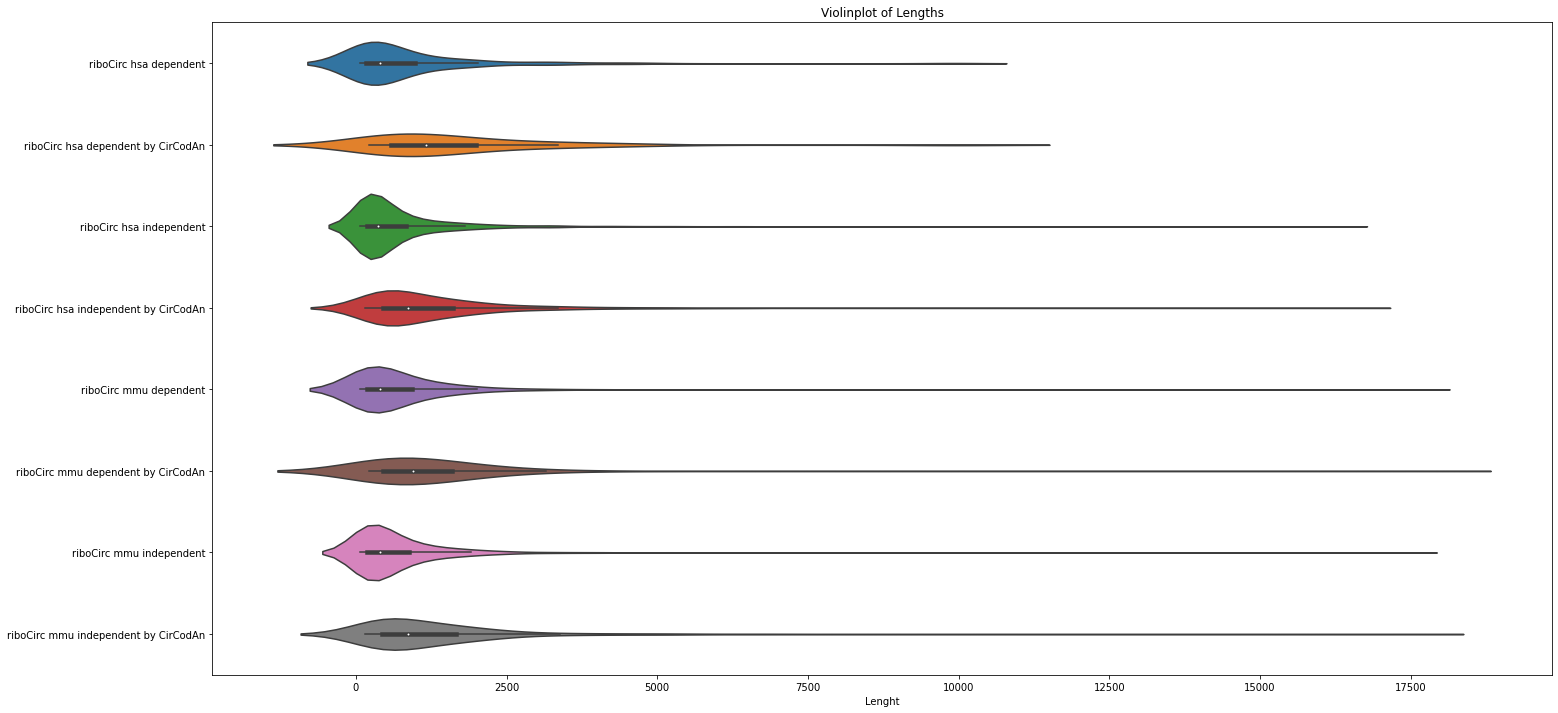

In [ ]:
plt.figure(figsize=(3*ribo_num_elements, 1.5*ribo_num_elements))

ax = sns.violinplot(data=ribo_lengths_data, orient='h')

plt.title('Violinplot of Lengths')
plt.xlabel('Lenght')
plt.ylabel('')
#plt.yticks(np.arange(0, 11501, 500))
ax.set_yticklabels(ribo_datasets)
plt.gca().set_facecolor('white')

plt.show()